In [55]:
# Loading Libraries
import os
import numpy as np
from surprise import BaselineOnly
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD
import csv
import matplotlib.mlab as mlab
from surprise.model_selection import train_test_split

# Part 3: MovieLens Dataset

In [192]:
# loading the data
file_path_ratings = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/ratings.csv')
file_path_movies = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/movies.csv')

movie_list = []
genre_list = []

user_id = []
movie_id = []
ratings = []

# loading the movie list
with open(file_path_movies) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        movie_list.append(int(row['movieId']))
        genre_list.append(row['genres'])

# loading the user_id and ratings
with open(file_path_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

In [3]:
# Making the R matrix
# There are 671 users and 9125 movies
R = np.zeros((671, 9125))
for i in xrange(0, np.size(user_id)):
    x = user_id[i] - 1
    y = movie_list.index(movie_id[i])    
    R[x,y] = ratings[i]

## Question 2

In [4]:
# Histogram Prep
r = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
count_r = np.zeros(np.size(r))
for i in ratings:
    x = r.index(i)
    count_r[x] += 1
    

Text(0.5,1,u'Frequency of the Rating Values')

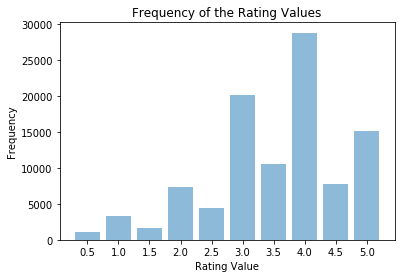

In [5]:
# Plot without zeros
y_pos = np.arange(len(r))
plt.bar(y_pos, count_r, align='center', alpha=0.5)
plt.xticks(y_pos, r)
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.title('Frequency of the Rating Values')

## Question 3

Text(0.5,1,u'Distribution of Ratings Among Movies')

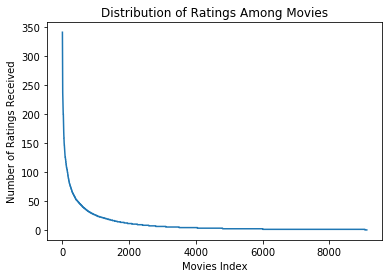

In [6]:
# Count all non zeros
count_m = np.count_nonzero(R, axis=0)
count_m = sorted(count_m, reverse=True)
plt.plot(count_m)
plt.xlabel('Movies Index')
plt.ylabel('Number of Ratings Received')
plt.title('Distribution of Ratings Among Movies')

## Question 4

Text(0.5,1,u'Distribution of Ratings Among User')

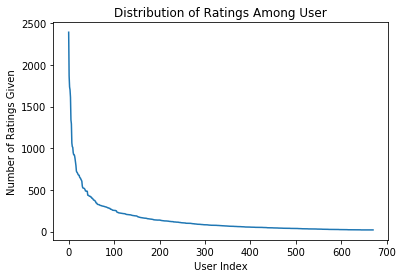

In [7]:
# Count all non zeros
count_u = np.count_nonzero(R, axis=1)
count_u = sorted(count_u, reverse=True)
plt.plot(count_u)
plt.xlabel('User Index')
plt.ylabel('Number of Ratings Given')
plt.title('Distribution of Ratings Among User')

## Question 6

C:\Python27\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


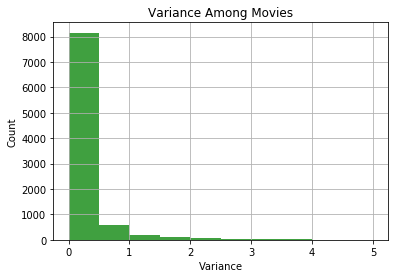

In [8]:
var_m = np.var(R, axis = 0)

bin_size = 0.5; min_edge = 0; max_edge = 5
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(var_m, bins=bin_list, facecolor='green', alpha=0.75)
plt.xlabel('Variance')
plt.ylabel('Count')
plt.title('Variance Among Movies')
plt.grid(True)

# Part 4: Neighborhood-based collaborative ﬁltering

In [9]:
# path to dataset file
file_path = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/ratings.csv')

# As we're loading a custom dataset, we need to define a reader. In the
# movielens dataset, each line has the following format:
# 'user item rating timestamp', separated by ',' characters. because CSV (Comma Separated Values)
# We skip the first line 
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file(file_path, reader=reader)

## Question 10

In [10]:
# Making sure we are using Pearson and User Base methods
sim_options = {'name': 'pearson', 'user_base': True}

# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE = []
MAE = []

# Sweep through different k values
for k in xrange(2, 102, 2):
    print 'k = ', k
    knn = KNNWithMeans(k = k, sim_options = sim_options)
    temp_rmse = []
    temp_mae = []
    for train, test in kf.split(data):
        knn.fit(train)
        pred = knn.test(test)
        temp_rmse.append(accuracy.rmse(pred, verbose = False))
        temp_mae.append(accuracy.mae(pred, verbose = False))
    RMSE.append(np.nanmean(temp_rmse))
    MAE.append(np.nanmean(temp_mae))

k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simi

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

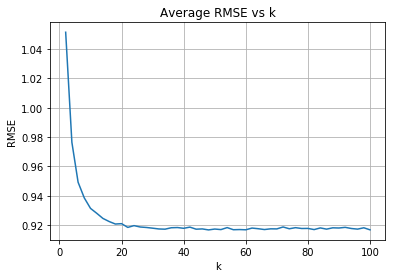

In [11]:
# Plot RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Average RMSE vs k')
plt.grid(True)


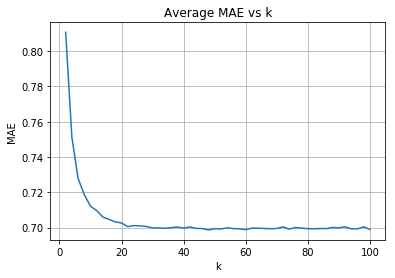

In [12]:
# Plot MAE
plt.plot(x, MAE)
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('Average MAE vs k')
plt.grid(True)

## Question 12, 13, 14

In [13]:
# Finding the number of ratings per movie
count_m = np.count_nonzero(R, axis=0)
# var_m = variance of movies
var_m = np.var(R, axis = 0)
# movie_list has the list of movie_ids to correlate it with the position in array

In [16]:
## Testdata is split into 3 columns (user_id-string, movie_id-)
def trim(testdata):
    popular = []
    nonpopular = []
    high_var = []
    
    for i in xrange(0, np.size(testdata,0), 1):
        index = movie_list.index(int(testdata[i][1]) ) 
                                 
        # Testing for popular/nonpopular   
        if count_m[index] > 2:
            popular.append(testdata[i])
        else:
            nonpopular.append(testdata[i])
        
        # Testing for high variance
        if (count_m[index] >= 5) and (var_m[index] >= 2):
            high_var.append(testdata[i])
                                 
    
    return popular, nonpopular, high_var

In [17]:
# Making sure we are using Pearson and User Base methods
sim_options = {'name': 'pearson', 'user_base': True}

# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_P = []
MAE_P = []
RMSE_NP = []
MAE_NP = []
RMSE_HV = []
MAE_HV = []

# Sweep through different k values
for k in xrange(2, 102, 2):
    print 'k = ', k
    knn = KNNWithMeans(k = k, min_k = k, sim_options = sim_options)
    
    rmse_p = []
    rmse_np = []
    rmse_hv = []
    
    
    for train, test in kf.split(data):
        knn.fit(train)
        
        popular, nonpopular, high_var = trim(test)
        
        # Testing popular
        pred = knn.test(popular)
        rmse_p.append(accuracy.rmse(pred, verbose = True))
        
        # Testing nonpopular
        pred = knn.test(nonpopular)
        rmse_np.append(accuracy.rmse(pred, verbose = True))
        
        # Testing high variance
        pred = knn.test(high_var)
        rmse_hv.append(accuracy.rmse(pred, verbose = True))
        
    RMSE_P.append(np.nanmean(rmse_p))
    RMSE_NP.append(np.nanmean(rmse_np))
    RMSE_HV.append(np.nanmean(rmse_hv))

k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0437
RMSE: 1.1378
RMSE: 1.0013
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0516
RMSE: 1.1331
RMSE: 1.0328
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0351
RMSE: 1.0778
RMSE: 1.0055
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0533
RMSE: 1.1447
RMSE: 1.0064
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531
RMSE: 1.1386
RMSE: 1.0423
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0322
RMSE: 1.1713
RMSE: 1.0074
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0355
RMSE: 1.1192
RMSE: 0.9833
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0489
RMSE: 1.1881
RMSE: 1.0138
Computing the pearson similarity matrix...
Done computing similar

Done computing similarity matrix.
RMSE: 0.8982
RMSE: 1.1521
RMSE: 0.8345
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9193
RMSE: 1.1344
RMSE: 0.8698
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9071
RMSE: 1.1374
RMSE: 0.8525
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9159
RMSE: 1.1635
RMSE: 0.8370
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9166
RMSE: 1.1532
RMSE: 0.8321
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9086
RMSE: 1.0749
RMSE: 0.8801
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9182
RMSE: 1.1375
RMSE: 0.8280
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9151
RMSE: 1.2147
RMSE: 0.8476
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9117
RMSE: 1.0975
RMSE: 0.8395

RMSE: 0.9074
RMSE: 1.1519
RMSE: 0.8144
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9263
RMSE: 1.1370
RMSE: 0.8223
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9231
RMSE: 1.1170
RMSE: 0.8330
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9127
RMSE: 1.1940
RMSE: 0.8349
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9246
RMSE: 1.1101
RMSE: 0.8532
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9163
RMSE: 1.1537
RMSE: 0.8163
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9090
RMSE: 1.1427
RMSE: 0.8186
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9198
RMSE: 1.1297
RMSE: 0.8442
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9259
RMSE: 1.1302
RMSE: 0.8604
Computing the pearson similarity 

RMSE: 0.8611
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9156
RMSE: 1.0679
RMSE: 0.8363
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9210
RMSE: 1.1221
RMSE: 0.8250
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9059
RMSE: 1.1590
RMSE: 0.8110
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9404
RMSE: 1.1457
RMSE: 0.8393
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9182
RMSE: 1.1967
RMSE: 0.8219
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9384
RMSE: 1.1162
RMSE: 0.8244
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9434
RMSE: 1.1821
RMSE: 0.8610
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9246
RMSE: 1.1938
RMSE: 0.7997
Computing the pearson similarity matrix...
Done computing s

Done computing similarity matrix.
RMSE: 0.9382
RMSE: 1.1233
RMSE: 0.7973
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9489
RMSE: 1.1723
RMSE: 0.8455
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9234
RMSE: 1.1353
RMSE: 0.8047
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9307
RMSE: 1.1850
RMSE: 0.8405
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9329
RMSE: 1.1312
RMSE: 0.8453
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9273
RMSE: 1.1788
RMSE: 0.8328
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9456
RMSE: 1.0987
RMSE: 0.8664
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9332
RMSE: 1.1168
RMSE: 0.8235
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9271
RMSE: 1.1018
RMSE: 0.8358

RMSE: 0.9313
RMSE: 1.1055
RMSE: 0.8326
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9356
RMSE: 1.2212
RMSE: 0.8399
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9414
RMSE: 1.1407
RMSE: 0.8551
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9459
RMSE: 1.1121
RMSE: 0.8414
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9466
RMSE: 1.1473
RMSE: 0.8407
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9265
RMSE: 1.1511
RMSE: 0.8235
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9400
RMSE: 1.1601
RMSE: 0.8590
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9339
RMSE: 1.0965
RMSE: 0.8470
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9236
RMSE: 1.1612
RMSE: 0.8237
k =  74
Computing the pearson sim

RMSE: 0.8429
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9197
RMSE: 1.1793
RMSE: 0.8363
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9495
RMSE: 1.1195
RMSE: 0.8582
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9450
RMSE: 1.1753
RMSE: 0.8447
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9377
RMSE: 1.2006
RMSE: 0.8371
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9410
RMSE: 1.0912
RMSE: 0.8465
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9355
RMSE: 1.1997
RMSE: 0.8473
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9447
RMSE: 1.1031
RMSE: 0.8586
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9476
RMSE: 1.0821
RMSE: 0.8661
k =  88
Computing the pearson similarity matrix...
Done com

Done computing similarity matrix.
RMSE: 0.9464
RMSE: 1.1844
RMSE: 0.8730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9420
RMSE: 1.1182
RMSE: 0.8756
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531
RMSE: 1.1598
RMSE: 0.8601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9350
RMSE: 1.1045
RMSE: 0.8570
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9474
RMSE: 1.1413
RMSE: 0.8785
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9426
RMSE: 1.2150
RMSE: 0.8886
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9453
RMSE: 1.1743
RMSE: 0.8773
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9424
RMSE: 1.1285
RMSE: 0.8486


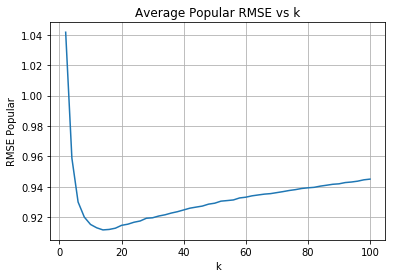

In [18]:
# Plot Popular RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_P)
plt.xlabel('k')
plt.ylabel('RMSE Popular')
plt.title('Average Popular RMSE vs k')
plt.grid(True)

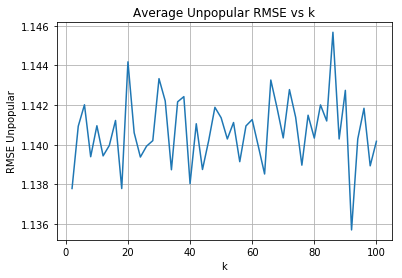

In [19]:
# Plot Unpopular RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_NP)
plt.xlabel('k')
plt.ylabel('RMSE Unpopular')
plt.title('Average Unpopular RMSE vs k')
plt.grid(True)

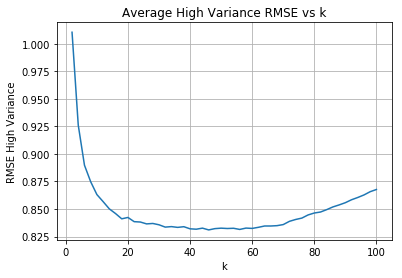

In [20]:
# Plot High Variance RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_HV)
plt.xlabel('k')
plt.ylabel('RMSE High Variance')
plt.title('Average High Variance RMSE vs k')
plt.grid(True)

In [21]:
# Printing Minimum Value for Average RMSE 
print 'min RMSE (popular): ', min(RMSE_P)
print 'min RMSE (unpopular): ', min(RMSE_NP)
print 'min RMSE (high variance): ', min(RMSE_HV)

min RMSE (popular):  0.911735832606
min RMSE (unpopular):  1.13569881971
min RMSE (high variance):  0.83105120573


## Question 15

In [121]:
# sample random trainset and testset
# test set is made of 10% of the ratings.
trainset, testset = train_test_split(data, test_size=.1)
threshold = [2.5,3.0,3.5,4.0]
sim_options = {'name': 'pearson', 'user_base': True}

knn = KNNWithMeans(k = 22, sim_options = sim_options)
knn.fit(trainset)
pred = knn.test(testset)



Computing the pearson similarity matrix...
Done computing similarity matrix.


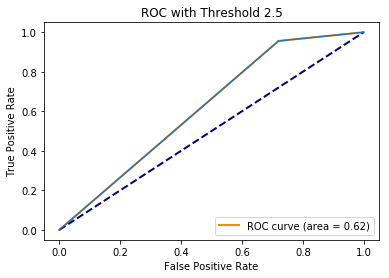

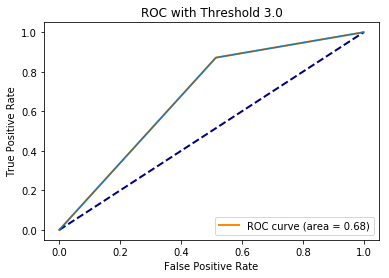

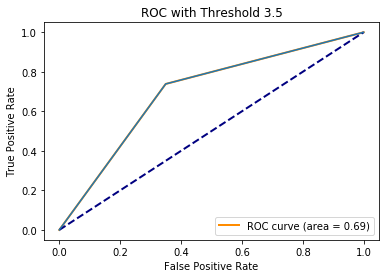

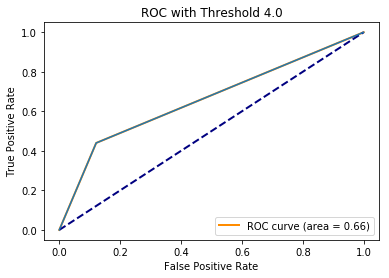

In [122]:
for i in threshold:
    # Adding predicted values and actual into an arry
    predicted = []
    actual = []
    
    for j in xrange(0, len(testset), 1):
        predicted.append(0 if pred[j].est < i else 1)
        actual.append(0 if testset[j][2] < i else 1)
    
    # Calculate fpr, tpr, area
    fpr, tpr, threshOut = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC with Threshold %0.1f' % i)
    plt.legend(loc="lower right")

# Part 5 Model-based Collaboration Filtering

## Question 17

In [125]:
km = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_NMF = []
MAE_NMF = []

for k in xrange(2, 52, 2):
    print 'Calculating K ', k
    nnmf = NMF(n_factors = k)
    temp_rmse = []
    temp_mae = []
    for train, test in kf.split(data):
        nnmf.fit(train)
        pred = nnmf.test(test)
        temp_rmse.append(accuracy.rmse(pred, verbose = False))
        temp_mae.append(accuracy.mae(pred, verbose = False))
    RMSE_NMF.append(np.nanmean(temp_rmse))
    MAE_NMF.append(np.nanmean(temp_mae))

Calculating K  2
Calculating K  4
Calculating K  6
Calculating K  8
Calculating K  10
Calculating K  12
Calculating K  14
Calculating K  16
Calculating K  18
Calculating K  20
Calculating K  22
Calculating K  24
Calculating K  26
Calculating K  28
Calculating K  30
Calculating K  32
Calculating K  34
Calculating K  36
Calculating K  38
Calculating K  40
Calculating K  42
Calculating K  44
Calculating K  46
Calculating K  48
Calculating K  50


Lowest average RMSE is  0.936827102876  at k =  16


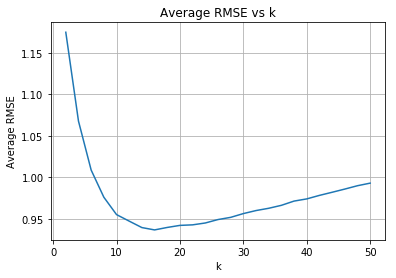

In [126]:
# Plot RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_NMF)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_NMF), ' at k = ' , 2*(1+RMSE_NMF.index(np.min(RMSE_NMF)))

Lowest average RMSE is  0.714334521549  at k =  24


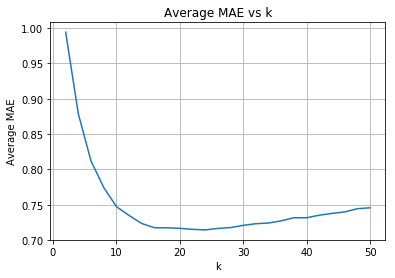

In [127]:
# Plot MAE
x = range(2, 52, 2)
plt.plot(x, MAE_NMF)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Average MAE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(MAE_NMF), ' at k = ' , 2*(1+MAE_NMF.index(np.min(MAE_NMF)))

In [172]:
print 'Checking k = 24. RMSE = ', RMSE_NMF[11]
print 'Checking k = 16. MAE = ', MAE_NMF[7]

Checking k = 24. RMSE =  0.94517638334
Checking k = 16. MAE =  0.71743227389


## Question 19, 20, 21

In [28]:
# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_NMF_P = []
RMSE_NMF_NP = []
RMSE_NMF_HV = []

# Sweep through different k values
for k in xrange(2, 52, 2):
    print 'k = ', k
    nnmf = NMF(n_factors = k)
    
    rmse_p = []
    rmse_np = []
    rmse_hv = []
    
    
    for train, test in kf.split(data):
        nnmf.fit(train)
        
        popular, nonpopular, high_var = trim(test)
        
        # Testing popular
        pred = nnmf.test(popular)
        rmse_p.append(accuracy.rmse(pred, verbose = True))
        
        # Testing nonpopular
        pred = nnmf.test(nonpopular)
        rmse_np.append(accuracy.rmse(pred, verbose = True))
        
        # Testing high variance
        pred = nnmf.test(high_var)
        rmse_hv.append(accuracy.rmse(pred, verbose = True))
        
    RMSE_NMF_P.append(np.nanmean(rmse_p))
    RMSE_NMF_NP.append(np.nanmean(rmse_np))
    RMSE_NMF_HV.append(np.nanmean(rmse_hv))

k =  2
RMSE: 1.1576
RMSE: 1.3168
RMSE: 1.1751
RMSE: 1.1684
RMSE: 1.2513
RMSE: 1.1934
RMSE: 1.1710
RMSE: 1.2351
RMSE: 1.1752
RMSE: 1.1713
RMSE: 1.3108
RMSE: 1.1790
RMSE: 1.1661
RMSE: 1.2194
RMSE: 1.1774
RMSE: 1.1741
RMSE: 1.2550
RMSE: 1.1886
RMSE: 1.1821
RMSE: 1.2987
RMSE: 1.1826
RMSE: 1.1761
RMSE: 1.2727
RMSE: 1.1802
RMSE: 1.1756
RMSE: 1.2817
RMSE: 1.1927
RMSE: 1.1798
RMSE: 1.2842
RMSE: 1.1840
k =  4
RMSE: 1.0636
RMSE: 1.2782
RMSE: 1.0392
RMSE: 1.0663
RMSE: 1.2767
RMSE: 1.0372
RMSE: 1.0527
RMSE: 1.2548
RMSE: 1.0217
RMSE: 1.0617
RMSE: 1.2500
RMSE: 1.0328
RMSE: 1.0558
RMSE: 1.2280
RMSE: 1.0326
RMSE: 1.0593
RMSE: 1.2665
RMSE: 1.0376
RMSE: 1.0587
RMSE: 1.2979
RMSE: 1.0153
RMSE: 1.0526
RMSE: 1.2611
RMSE: 1.0313
RMSE: 1.0408
RMSE: 1.2123
RMSE: 1.0279
RMSE: 1.0567
RMSE: 1.2981
RMSE: 1.0089
k =  6
RMSE: 0.9936
RMSE: 1.2888
RMSE: 0.9454
RMSE: 0.9937
RMSE: 1.3048
RMSE: 0.9461
RMSE: 1.0049
RMSE: 1.2768
RMSE: 0.9476
RMSE: 0.9853
RMSE: 1.2031
RMSE: 0.9121
RMSE: 0.9968
RMSE: 1.2250
RMSE: 0.9499
RMSE

RMSE: 0.9583
RMSE: 1.1844
RMSE: 0.9045
RMSE: 0.9642
RMSE: 1.2921
RMSE: 0.9277
RMSE: 0.9536
RMSE: 1.2599
RMSE: 0.8929
RMSE: 0.9626
RMSE: 1.2189
RMSE: 0.9115
k =  44
RMSE: 0.9801
RMSE: 1.2252
RMSE: 0.9240
RMSE: 0.9575
RMSE: 1.1738
RMSE: 0.9136
RMSE: 0.9721
RMSE: 1.2468
RMSE: 0.9222
RMSE: 0.9672
RMSE: 1.2223
RMSE: 0.9144
RMSE: 0.9576
RMSE: 1.2260
RMSE: 0.9242
RMSE: 0.9634
RMSE: 1.1587
RMSE: 0.9133
RMSE: 0.9659
RMSE: 1.2209
RMSE: 0.9255
RMSE: 0.9667
RMSE: 1.1951
RMSE: 0.9306
RMSE: 0.9568
RMSE: 1.2256
RMSE: 0.8943
RMSE: 0.9700
RMSE: 1.2846
RMSE: 0.9120
k =  46
RMSE: 0.9722
RMSE: 1.1993
RMSE: 0.9224
RMSE: 0.9742
RMSE: 1.1934
RMSE: 0.9213
RMSE: 0.9675
RMSE: 1.2076
RMSE: 0.8852
RMSE: 0.9782
RMSE: 1.3019
RMSE: 0.9461
RMSE: 0.9559
RMSE: 1.1790
RMSE: 0.9424
RMSE: 0.9596
RMSE: 1.2093
RMSE: 0.9146
RMSE: 0.9786
RMSE: 1.2330
RMSE: 0.9303
RMSE: 0.9617
RMSE: 1.1896
RMSE: 0.9508
RMSE: 0.9697
RMSE: 1.2240
RMSE: 0.8910
RMSE: 0.9744
RMSE: 1.1950
RMSE: 0.9197
k =  48
RMSE: 0.9682
RMSE: 1.1870
RMSE: 0.9080
R

KeyboardInterrupt: 

Lowest average RMSE is  0.916175602019 at k =  16


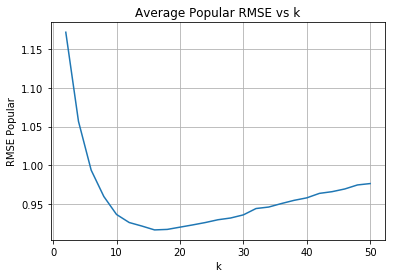

In [69]:
# Plot Popular RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_NMF_P)
plt.xlabel('k')
plt.ylabel('RMSE Popular')
plt.title('Average Popular RMSE vs k')
plt.grid(True)

print 'Lowest average RMSE is ', np.min(RMSE_NMF_P), 'at k = '  , 2*(1+RMSE_NMF_P.index(np.min(RMSE_NMF_P)))

Lowest average RMSE is  1.21321146118  at k =  46


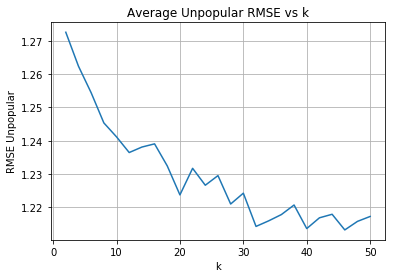

In [70]:
# Plot Unpopular RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_NMF_NP)
plt.xlabel('k')
plt.ylabel('RMSE Unpopular')
plt.title('Average Unpopular RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_NMF_NP), ' at k = ' , 2*(1+RMSE_NMF_NP.index(np.min(RMSE_NMF_NP)))

Lowest average RMSE is  0.839741052528  at k = 16


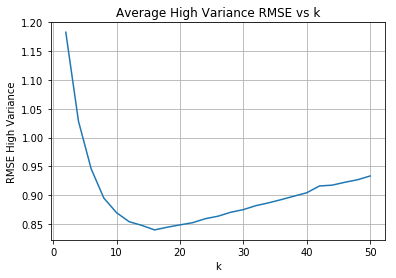

In [74]:
# Plot High Variance RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_NMF_HV)
plt.xlabel('k')
plt.ylabel('RMSE High Variance')
plt.title('Average High Variance RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_NMF_HV), ' at k =' , 2*(1+RMSE_NMF_HV.index(np.min(RMSE_NMF_HV)))

## Question 22

In [75]:
# sample random trainset and testset
# test set is made of 10% of the ratings.
trainset, testset = train_test_split(data, test_size=.1)
threshold = [2.5,3.0,3.5,4.0]

k = 22
nnmf = NMF(n_factors = k)
nnmf.fit(trainset)
pred = nnmf.test(testset)

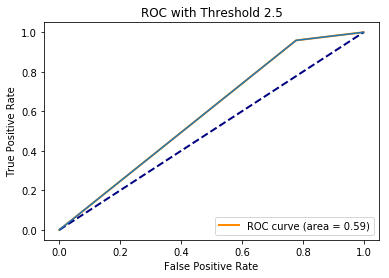

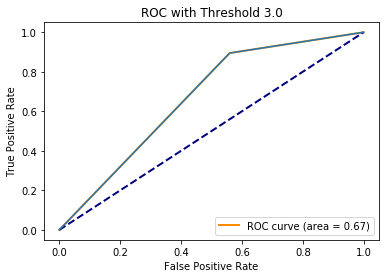

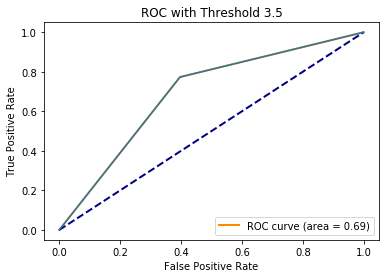

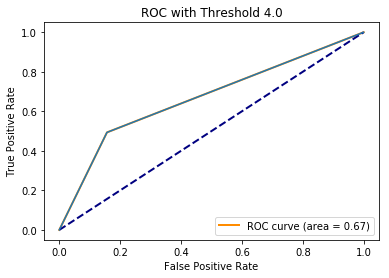

In [76]:
for i in threshold:
    # Adding predicted values and actual into an arry
    predicted = []
    actual = []
    
    for j in xrange(0, len(testset), 1):
        predicted.append(0 if pred[j].est < i else 1)
        actual.append(0 if testset[j][2] < i else 1)
    
    # Calculate fpr, tpr, area
    fpr, tpr, threshOut = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC with Threshold %0.1f' % i)
    plt.legend(loc="lower right")

## Question 23

In [188]:
# sample random trainset and testset
# test set is made of 10% of the ratings.
trainset, testset = train_test_split(data, test_size=.1)

k = 20
nnmf = NMF(n_factors = k)
nnmf.fit(trainset)
pred = nnmf.test(testset)

In [189]:
map_movies = []
for item_id in trainset.all_items():
    map_movies.append(trainset.to_raw_iid(item_id) )

In [194]:
print np.size(nnmf.qi,0), np.size(nnmf.qi,1)
#print nnmf.qi

map_movies = [] #movie ids
for item_id in trainset.all_items():
    map_movies.append(trainset.to_raw_iid(item_id))
print np.size(map_movies)

#sorting
index_qi = []
for i in xrange(0, np.size(nnmf.qi,1)):
    index_qi.append(np.argsort(nnmf.qi[:,i]))

sorted_qi_index = np.fliplr(index_qi)
print sorted_qi_index

###getting top 10 movie ids
#each row is a different feature
top10_movie_ids = np.zeros((np.size(sorted_qi_index,0),10));

for sorted_range in xrange(0, np.size(sorted_qi_index,0)):
    for ten_range in xrange(0, 10):
        top10_movie_ids[sorted_range,ten_range] = map_movies[sorted_qi_index[sorted_range,ten_range]]  #looking at top 10
#print np.size(top10_movie_ids,0), np.size(top10_movie_ids,1)

#getting movie genres
top10_genres = []
curr10 = []
for i in xrange(0, np.size(top10_movie_ids,0)):
    for j in xrange(0, np.size(top10_movie_ids,1)):
        curr_genre = genre_list[movie_list.index(top10_movie_ids[i,j])]
        curr10.append(curr_genre)
    top10_genres.append(curr10)
    curr10 = []
    
print np.size(top10_genres,0), np.size(top10_genres,1)
print top10_genres[0]
print top10_genres[1]
print top10_genres[2]
print top10_genres[3]
print top10_genres[4]

8737 20
8737
[[3813 8085 3034 ..., 4778 6442 7537]
 [2248 2570 4146 ..., 1774 7055 4006]
 [ 561 5169 3040 ..., 6431 8039 5284]
 ..., 
 [4681 6522 2858 ..., 4503 5466 5186]
 [1192 4681 1213 ..., 8085 1774 4006]
 [4006 8085 3589 ..., 7651 2020 6442]]
20 10
['Horror|Thriller', 'Adventure|Comedy|Thriller', 'Crime|Drama|Film-Noir|Mystery', 'Drama', 'Comedy|Fantasy|Musical|Romance', 'Comedy', 'Documentary|War', 'Action|Fantasy|Horror|Thriller', 'Action|Adventure|War', 'Animation|Comedy|Musical']
['Action|Adventure|Sci-Fi', 'Animation', 'Action|Adventure|Children|Fantasy', 'Comedy|Drama', 'Documentary|Musical', 'Action|Adventure|Fantasy|Romance|IMAX', 'Drama', 'Drama|Fantasy|Mystery|Romance', 'Crime|Drama|Thriller', 'Comedy|Horror|Romance']
['Comedy|Drama|Fantasy|Romance', 'Drama', 'Comedy|Drama|War', 'Drama', 'Crime|Drama|Mystery|Romance|Thriller', 'Children|Comedy', 'Drama|War', 'Drama|Romance', 'Action|Drama|Romance', 'Action|Mystery|Thriller']
['Musical', 'Adventure|Children|Drama', 'Thri

## Question 24 with init_mean

In [86]:
km = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_SVD = []
MAE_SVD = []
init_mean = np.mean(ratings)
for k in xrange(2, 52, 2):
    print 'Calculating K ', k
    svd = SVD(n_factors = k, init_mean = init_mean)
    temp_rmse = []
    temp_mae = []
    for train, test in kf.split(data):
        svd.fit(train)
        pred = svd.test(test)
        temp_rmse.append(accuracy.rmse(pred, verbose = False))
        temp_mae.append(accuracy.mae(pred, verbose = False))
    RMSE_SVD.append(np.nanmean(temp_rmse))
    MAE_SVD.append(np.nanmean(temp_mae))

Calculating K  2
Calculating K  4
Calculating K  6
Calculating K  8
Calculating K  10
Calculating K  12
Calculating K  14
Calculating K  16
Calculating K  18
Calculating K  20
Calculating K  22
Calculating K  24
Calculating K  26
Calculating K  28
Calculating K  30
Calculating K  32
Calculating K  34
Calculating K  36
Calculating K  38
Calculating K  40
Calculating K  42
Calculating K  44


KeyboardInterrupt: 

Lowest average RMSE is  0.911741373498  at k =  2


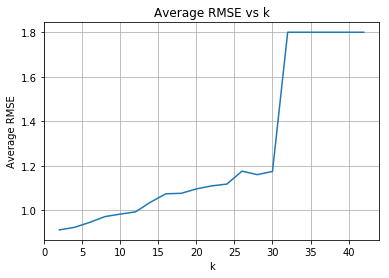

In [91]:
# Plot RMSE
x = range(2, 44, 2)
plt.plot(x,RMSE_SVD)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_SVD), ' at k = ' , 2*(1+RMSE_SVD.index(np.min(RMSE_SVD)))

Lowest average MAE is  0.700323040399  at k =  2


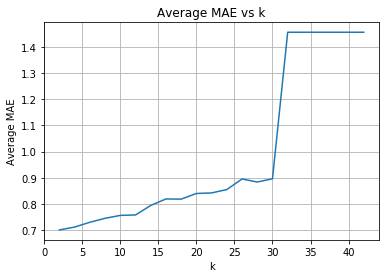

In [92]:
# Plot MAE
x = range(2, 44, 2)
plt.plot(x,MAE_SVD)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Average MAE vs k')
plt.grid(True)
print 'Lowest average MAE is ', np.min(MAE_SVD), ' at k = ' , 2*(1+MAE_SVD.index(np.min(MAE_SVD)))

## Question 24 without init_mean

In [117]:
km = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_SVD = []
MAE_SVD = []
for k in xrange(2, 52, 2):
    print 'Calculating K ', k
    svd = SVD(n_factors = k)
    temp_rmse = []
    temp_mae = []
    for train, test in kf.split(data):
        svd.fit(train)
        pred = svd.test(test)
        temp_rmse.append(accuracy.rmse(pred, verbose = False))
        temp_mae.append(accuracy.mae(pred, verbose = False))
    RMSE_SVD.append(np.nanmean(temp_rmse))
    MAE_SVD.append(np.nanmean(temp_mae))

Calculating K  2
Calculating K  4
Calculating K  6
Calculating K  8
Calculating K  10
Calculating K  12
Calculating K  14
Calculating K  16
Calculating K  18
Calculating K  20
Calculating K  22
Calculating K  24
Calculating K  26
Calculating K  28
Calculating K  30
Calculating K  32
Calculating K  34
Calculating K  36
Calculating K  38
Calculating K  40
Calculating K  42
Calculating K  44
Calculating K  46
Calculating K  48
Calculating K  50


Lowest average RMSE is  0.886484508095  at k =  6


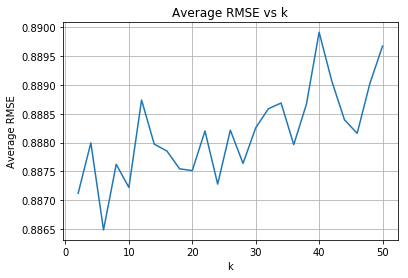

In [119]:
# Plot RMSE
x = range(2, 52, 2)
plt.plot(x,RMSE_SVD)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_SVD), ' at k = ' , 2*(1+RMSE_SVD.index(np.min(RMSE_SVD)))

Lowest average MAE is  0.682557661847  at k =  6


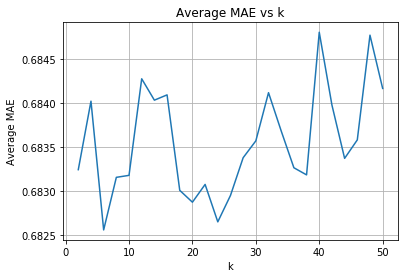

In [120]:
# Plot MAE
x = range(2, 52, 2)
plt.plot(x,MAE_SVD)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Average MAE vs k')
plt.grid(True)
print 'Lowest average MAE is ', np.min(MAE_SVD), ' at k = ' , 2*(1+MAE_SVD.index(np.min(MAE_SVD)))

## Question 26, 27,  28

In [90]:
# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_SVD_P = []
RMSE_SVD_NP = []
RMSE_SVD_HV = []

# Sweep through different k values
for k in xrange(2, 52, 2):
    print 'k = ', k
    svd = SVD(n_factors = k)
    
    rmse_p = []
    rmse_np = []
    rmse_hv = []
    
    
    for train, test in kf.split(data):
        svd.fit(train)
        
        popular, nonpopular, high_var = trim(test)
        
        # Testing popular
        pred = svd.test(popular)
        rmse_p.append(accuracy.rmse(pred, verbose = False))
        
        # Testing nonpopular
        pred = svd.test(nonpopular)
        rmse_np.append(accuracy.rmse(pred, verbose = False))
        
        # Testing high variance
        pred = svd.test(high_var)
        rmse_hv.append(accuracy.rmse(pred, verbose = False))
        
    RMSE_SVD_P.append(np.nanmean(rmse_p))
    RMSE_SVD_NP.append(np.nanmean(rmse_np))
    RMSE_SVD_HV.append(np.nanmean(rmse_hv))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


Lowest average RMSE is  0.879076938387 at k =  16


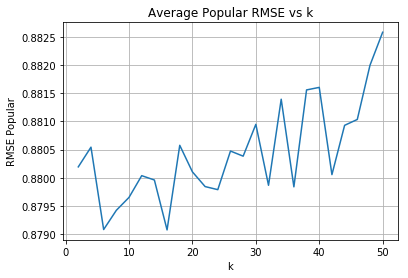

In [93]:
# Plot Popular RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_SVD_P)
plt.xlabel('k')
plt.ylabel('RMSE Popular')
plt.title('Average Popular RMSE vs k')
plt.grid(True)

print 'Lowest average RMSE is ', np.min(RMSE_SVD_P), 'at k = '  , 2*(1+RMSE_SVD_P.index(np.min(RMSE_SVD_P)))

Lowest average RMSE is  1.00554938648  at k =  12


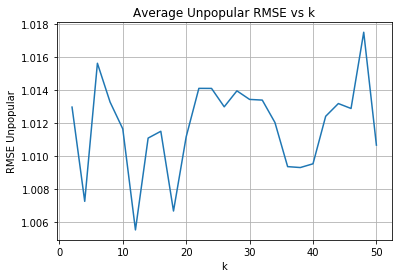

In [94]:
# Plot Unpopular RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_SVD_NP)
plt.xlabel('k')
plt.ylabel('RMSE Unpopular')
plt.title('Average Unpopular RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_SVD_NP), ' at k = ' , 2*(1+RMSE_SVD_NP.index(np.min(RMSE_SVD_NP)))

Lowest average RMSE is  0.82430224237  at k = 46


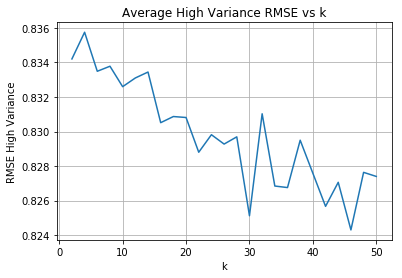

In [81]:
# Plot High Variance RMSE
x = range(2, 52, 2)
plt.plot(x, RMSE_SVD_HV)
plt.xlabel('k')
plt.ylabel('RMSE High Variance')
plt.title('Average High Variance RMSE vs k')
plt.grid(True)
print 'Lowest average RMSE is ', np.min(RMSE_SVD_HV), ' at k =' , 2*(1+RMSE_SVD_HV.index(np.min(RMSE_SVD_HV)))

## Question 29

In [95]:
# sample random trainset and testset
# test set is made of 10% of the ratings.
trainset, testset = train_test_split(data, test_size=.1)
threshold = [2.5,3.0,3.5,4.0]

k = 2
svd = SVD(n_factors = k)
svd.fit(trainset)
pred = svd.test(testset)

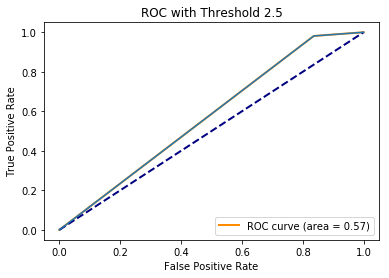

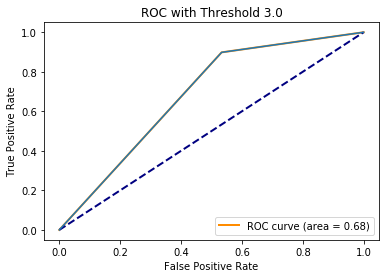

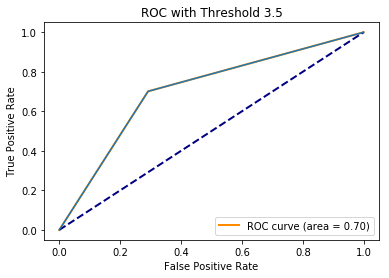

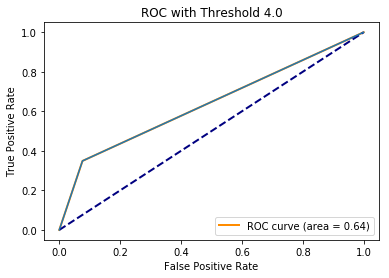

In [96]:
for i in threshold:
    # Adding predicted values and actual into an arry
    predicted = []
    actual = []
    
    for j in xrange(0, len(testset), 1):
        predicted.append(0 if pred[j].est < i else 1)
        actual.append(0 if testset[j][2] < i else 1)
    
    # Calculate fpr, tpr, area
    fpr, tpr, threshOut = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC with Threshold %0.1f' % i)
    plt.legend(loc="lower right")

# Part 7: Performance comparison

In [173]:
trainset, testset = train_test_split(data, test_size=.1)
k_knn = 22
k_nnmf = 16
k_svd = 6

sim_options = {'name': 'pearson', 'user_base': True}
knn = KNNWithMeans(k = k_knn, sim_options = sim_options)
knn.fit(trainset)
pred_knn = knn.test(testset)

nnmf = NMF(n_factors = k_nnmf)
nnmf.fit(trainset)
pred_nnmf = nnmf.test(testset)

svd = SVD(n_factors = k_svd)
svd.fit(trainset)
pred_svd = svd.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


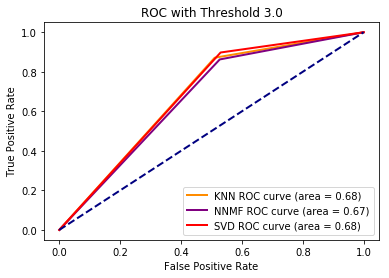

In [174]:
threshold = 3
# Adding predicted values and actual into an arry
predicted_knn = []
predicted_nnmf = []
predicted_svd = []
actual = []

for j in xrange(0, len(testset), 1):
    predicted_knn.append(0 if pred_knn[j].est < threshold else 1)
    predicted_nnmf.append(0 if pred_nnmf[j].est < threshold else 1)
    predicted_svd.append(0 if pred_svd[j].est < threshold else 1)
    actual.append(0 if testset[j][2] < threshold else 1)

# Calculate fpr, tpr, area
fpr_knn, tpr_knn, threshOut = roc_curve(actual, predicted_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nnmf, tpr_nnmf, threshOut = roc_curve(actual, predicted_nnmf)
roc_auc_nnmf = auc(fpr_nnmf, tpr_nnmf)

fpr_svd, tpr_svd, threshOut = roc_curve(actual, predicted_svd)
roc_auc_svd = auc(fpr_svd, tpr_svd)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nnmf, tpr_nnmf, color='purple', lw=2, label='NNMF ROC curve (area = %0.2f)' % roc_auc_nnmf)
plt.plot(fpr_svd, tpr_svd, color='red', lw=2, label='SVD ROC curve (area = %0.2f)' % roc_auc_svd)
plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with Threshold %0.1f' % threshold)
plt.legend(loc="lower right")

# Part 8 : Ranking

In [175]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# We want 10 folds
kf = KFold(n_splits=10)

k_knn = 22
k_nnmf = 16
k_svd = 6

sim_options = {'name': 'pearson', 'user_base': True}
knn = KNNWithMeans(k = k_knn, sim_options = sim_options)

nnmf = NMF(n_factors = k_nnmf)

svd = SVD(n_factors = k_svd)

# Counting how many movies the user rated
count_u = np.count_nonzero(R, axis=1)

In [176]:
# Making sure that the user rated more than or equal to t movies
# Also makes sure that the ground truth is provided

def trim_user(testset, t):
    new_data = []
    for i in xrange(0, np.size(testset, 0), 1):
        index = int(testset[i][0]) - 1 # Getting the user id
        
        if count_u[index] >= t and testset[i][2] != 0:
            new_data.append(testset[i])
    return new_data

In [180]:
threshold = 3

precision_knn = []
precision_nnmf = []
precision_svd = []

recall_knn = []
recall_nnmf =[]
recall_svd = []

for t in xrange(1, 26, 1):
    print 't = ', t
    temp_knn_p = []
    temp_nnmf_p = []
    temp_svd_p = []
    
    temp_knn_r = []
    temp_nnmf_r = []
    temp_svd_r = []
    
    for trainset, testset in kf.split(data):
        new_testset = trim_user(testset,t)
        
        knn.fit(trainset)
        pred_knn = knn.test(new_testset)
        
        nnmf.fit(trainset)
        pred_nnmf = nnmf.test(new_testset)
        
        svd.fit(trainset)
        pred_svd = svd.test(new_testset)
    
        # Adding predicted values and actual into an arry
        predicted_knn = []
        predicted_nnmf = []
        predicted_svd = []
        actual = []

        for j in xrange(0, len(new_testset), 1):
            predicted_knn.append(0 if pred_knn[j].est < threshold else 1)
            predicted_nnmf.append(0 if pred_nnmf[j].est < threshold else 1)
            predicted_svd.append(0 if pred_svd[j].est < threshold else 1)
            actual.append(0 if new_testset[j][2] < threshold else 1)
            
        temp_knn_p.append(precision_score(actual, predicted_knn))
        temp_nnmf_p.append(precision_score(actual, predicted_nnmf))
        temp_svd_p.append(precision_score(actual, predicted_svd))

        temp_knn_r.append(recall_score(actual, predicted_knn))
        temp_nnmf_r.append(recall_score(actual, predicted_nnmf))
        temp_svd_r.append(recall_score(actual, predicted_svd))
    
    
    precision_knn.append(np.nanmean(temp_knn_p)) 
    precision_nnmf.append(np.nanmean(temp_nnmf_p)) 
    precision_svd.append(np.nanmean(temp_svd_p)) 

    recall_knn.append(np.nanmean(temp_knn_r)) 
    recall_nnmf.append(np.nanmean(temp_nnmf_r))
    recall_svd.append(np.nanmean(temp_svd_r))
        
        
    


t =  1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
t =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simi

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
t =  12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
t =  23
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

## Question 36

Text(0.5,1,u'KNN precision against recall')

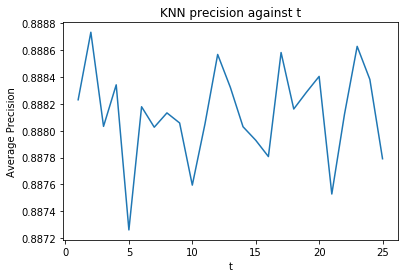

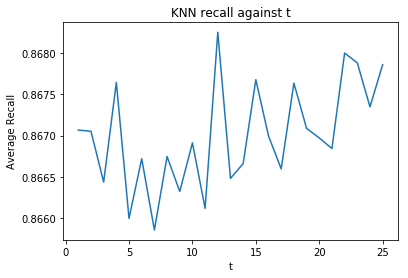

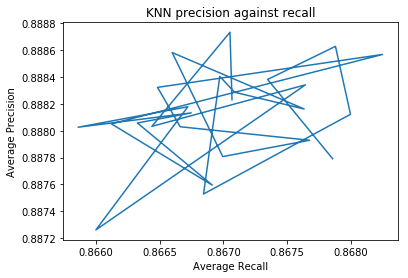

In [182]:
# Plot precison vs t
t = range(1, 26, 1)
plt.figure()
plt.plot(t, precision_knn)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('KNN precision against t')

# Plot recall vs t
plt.figure()
plt.plot(t, recall_knn)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('KNN recall against t')

# Plot precision vs recall 
plt.figure()
plt.plot(recall_knn, precision_knn)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('KNN precision against recall')

## Question 37

Text(0.5,1,u'NNMF precision against recall')

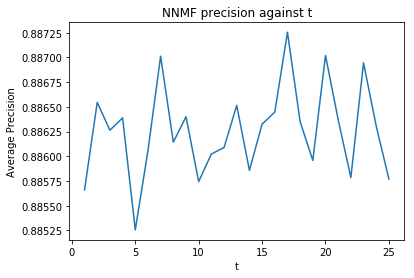

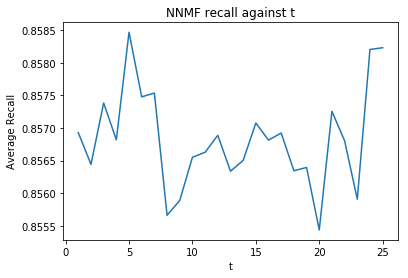

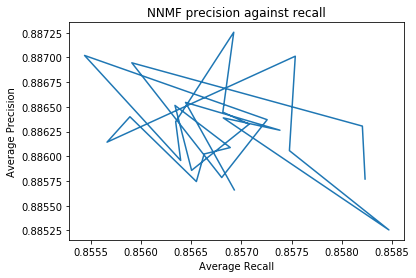

In [184]:
# Plot precison vs t
t = range(1, 26, 1)
plt.figure()
plt.plot(t, precision_nnmf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('NNMF precision against t')

# Plot recall vs t
plt.figure()
plt.plot(t, recall_nnmf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('NNMF recall against t')

# Plot precision vs recall 
plt.figure()
plt.plot(recall_nnmf, precision_nnmf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('NNMF precision against recall')

## Question 38

Text(0.5,1,u'SVD precision against recall')

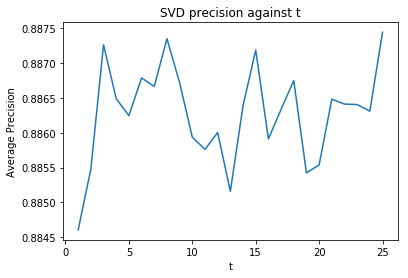

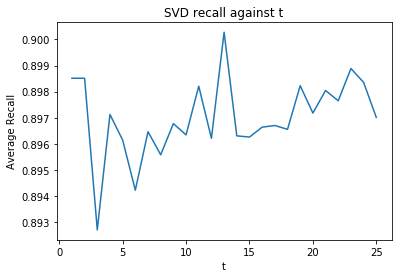

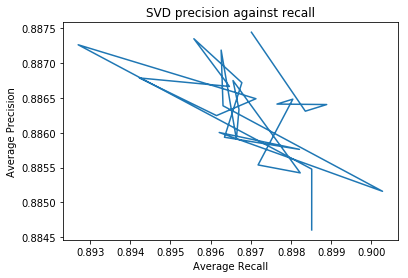

In [185]:
# Plot precison vs t
t = range(1, 26, 1)
plt.figure()
plt.plot(t, precision_svd)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('SVD precision against t')

# Plot recall vs t
plt.figure()
plt.plot(t, recall_svd)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('SVD recall against t')

# Plot precision vs recall 
plt.figure()
plt.plot(recall_svd, precision_svd)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('SVD precision against recall')

## Question 39

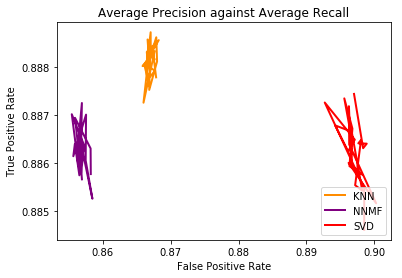

In [186]:
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='KNN')
plt.plot(recall_nnmf, precision_nnmf, color='purple', lw=2, label='NNMF')
plt.plot(recall_svd, precision_svd, color='red', lw=2, label='SVD')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average Precision against Average Recall')
plt.legend(loc="lower right")